# Exercise 1 - Logistic Regression

## Part 1 - The IRLS algorithm

In [12]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# Exercise 1.1.1

## See also: https://docs.sympy.org/latest/tutorial/calculus.html

def f(x):
    return np.sin(x)

def iterative_optimization(x):
    """ Using Newton-Raphson iterative optimization scheme """
    return x + (np.cos(x)/np.sin(x))

x_t = 1
n_iterations = 5

print("Starting the optimization process with x_0: {}".format(x_t))

for i in range(n_iterations):
    x_t = iterative_optimization(x_t)
    print("Step {}: {}".format(i, x_t))
    
# Starting the optimization process with x_0: 1
# Step 0: 1.6420926159343308
# Step 1: 1.5706752771612507
# Step 2: 1.5707963267954879
# Step 3: 1.5707963267948966
# Step 4: 1.5707963267948966

# Starting the optimization process with x_0: -1
# Step 0: -1.6420926159343308
# Step 1: -1.5706752771612507
# Step 2: -1.5707963267954879
# Step 3: -1.5707963267948966
# Step 4: -1.5707963267948966



    

Starting the optimization process with x_0: 1
Step 0: 1.6420926159343308
Step 1: 1.5706752771612507
Step 2: 1.5707963267954879
Step 3: 1.5707963267948966
Step 4: 1.5707963267948966


In [89]:
# Exercise 1.1.2

def sigmoid(x):
    """ The standard logistic function. np.exp also accepts arrays"""
    return 1.0 / (1 + np.exp(-x))

def gradient_of_error(phi, y, t):
    """ Gradient (first-order derivatives) of the error function, see Bishop page 207, eq. 4.96 """
    return np.dot(phi.T, y - t)

def hessian_of_error(phi, y):
    """ Hessian (second-order derivatives) of the error function, see Bishop page 207, eq. 4.97 """
    R = np.diag(np.ravel(y * (1 - y)))
    return np.dot(phi.T, np.dot(R, phi))

def cross_entropy_error(y, t):
    # Implementation of cross entropy error = E(w)
    result = 0
    for n in range(0, t.shape[0]):
        result += t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n])
    return -result


w = np.array([ [1.0], [1.0] ]) # two-dimensional weight vector
x = np.array([0.3, 0.44, 0.46, 0.6])
t = np.array([ [1], [0], [1], [0] ]) # targets
phi = np.array([ [1, x_element] for x_element in x ]) # feature vector

for i in range(10):
    y = sigmoid(np.dot(phi, w)) # class estimates
    
    current_gradient = gradient_of_error(phi, y, t)
    current_hessian = hessian_of_error(phi, y)
    
    w = w - np.dot(np.linalg.inv(current_hessian), current_gradient)
    
    print("Iteration {}: \nphi={} \ny={}, \ncurrent_gradient={}, \ncurrent_hessian={}, \nw={}\n".format(
        i, phi, y, current_gradient, current_hessian, w))
    
# Converges after 6 iterations  
# w=[[  9.78227684][-21.73839298]]

Iteration 0: 
phi=[[1.   0.3 ]
 [1.   0.44]
 [1.   0.46]
 [1.   0.6 ]] 
y=[[0.78583498]
 [0.80845465]
 [0.81153267]
 [0.83201839]], 
current_gradient=[[1.23784069]
 [0.7039866 ]], 
current_hessian=[[0.61586527 0.2728401 ]
 [0.2728401  0.12780555]], 
w=[[  8.93409151]
 [-21.44601155]]

Iteration 1: 
phi=[[1.   0.3 ]
 [1.   0.44]
 [1.   0.46]
 [1.   0.6 ]] 
y=[[0.92416201]
 [0.3770347 ]
 [0.28270691]
 [0.01919892]], 
current_gradient=[[-0.39689745]
 [-0.17529159]], 
current_hessian=[[0.52658017 0.22895168]
 [0.22895168 0.10146842]], 
w=[[  9.0716414 ]
 [-20.02882864]]

Iteration 2: 
phi=[[1.   0.3 ]
 [1.   0.44]
 [1.   0.46]
 [1.   0.6 ]] 
y=[[0.95534016]
 [0.56437983]
 [0.46465411]
 [0.04994223]], 
current_gradient=[[0.03431634]
 [0.01863541]], 
current_hessian=[[0.58471925 0.26387002]
 [0.26387002 0.12115438]], 
w=[[  9.69751114]
 [-21.54576651]]

Iteration 3: 
phi=[[1.   0.3 ]
 [1.   0.44]
 [1.   0.46]
 [1.   0.6 ]] 
y=[[0.96208592]
 [0.55413049]
 [0.44681658]
 [0.03805412]], 
current

Shape of loaded data: (1000, 3)
Shape of feature vector: (1000, 2)
Shape of label vector: (1000, 1)


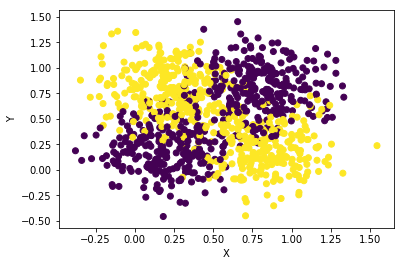

In [95]:
# Exercise 1.2.1

data = np.loadtxt("data/a010_irlsdata.txt")

print("Shape of loaded data: {}".format(data.shape))
X = data[:,0:2] # feature vector
print("Shape of feature vector: {}".format(X.shape))

Y = data[:,2:3] # label vector
print("Shape of label vector: {}".format(Y.shape))

# Plot
plt.scatter(X[:,0], X[:,1], c=Y.ravel())
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('figure_1_2_1.png')
plt.show()

Shape of x: 1000
Shape of t: 1000
Cross entropy error before optimization: [693.14718056]
Cross entropy error after optimization: [692.96935948]
Weights: [[ 0.00440664]
 [-0.02139153]
 [-0.04930069]]


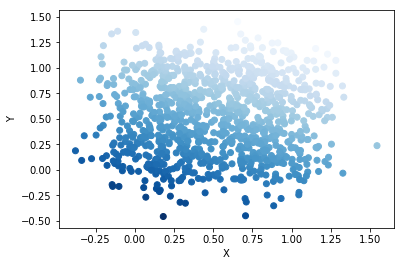

In [96]:
# Exercise 1.2.3

w = np.array([[0.0], [0.0], [0.0]]) # three-dimensional weight vector
x = X # data
t = Y # targets/labels, has to look like np.array([ [1], [0], [1], [0] ])

print("Shape of x: {}".format(x.shape[0]))
print("Shape of t: {}".format(t.shape[0]))

phi = np.array([ [1, x_element[0], x_element[1]] for x_element in x ]) # feature vector

y = sigmoid(np.dot(phi, w))
print("Cross entropy error before optimization: {}".format(cross_entropy_error(y, t)))

for i in range(0, 1000):
    y = sigmoid(np.dot(phi, w)) # class estimates
    current_gradient = gradient_of_error(phi, y, t)
    current_hessian = hessian_of_error(phi, y)
    
    w = w - np.dot(np.linalg.inv(current_hessian), current_gradient)
    
print("Cross entropy error after optimization: {}".format(cross_entropy_error(y, t)))
print("Weights: {}".format(w))

# Normalised [0,1]
y = (y - np.min(y))/np.ptp(y)

cmap = plt.get_cmap('Blues')
plt.scatter(x[:, 0], x[:, 1], c = np.squeeze(cmap(y)))
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('figure_1_2_3.png')
plt.show()

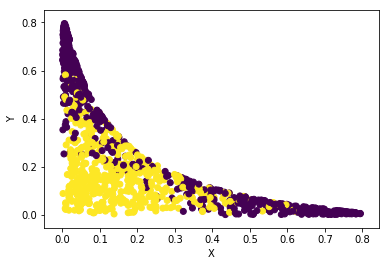

In [100]:
# Exercise 1.2.4

# Use identical, isotropic covariance matrices Sigma = sigma^2 * I with sigma^2 = 0.2
# and center the basis functions around mu_1 = (0,0) and mu_2 = (1,1)

def gaussian_basis_function(data, origin, variance):
    sigma = variance * np.identity(np.array(data).shape[0])
    a = (data-origin).T
    normalizer = 1.0 / (2*np.pi)**(a.shape[0]/2) * 1.0 / np.linalg.det(sigma)**(1/2)
    return normalizer * np.exp(-(1.0/2)*np.dot(a.T, np.dot(inv(sigma), a)))

phi = np.array([[1, gaussian_basis_function(xx, (0, 0), 0.2), gaussian_basis_function(xx, (1, 1), 0.2)] for xx in x])

plt.scatter(phi[:, 1], phi[:, 2], c = t.squeeze())
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('figure_1_2_4.png')
plt.show()

Cross entropy error before optimization: [690.64901362]
Cross entropy error after optimization: [346.50408046]
Weights: [[  7.10834887]
 [-15.42143347]
 [-15.53830921]]


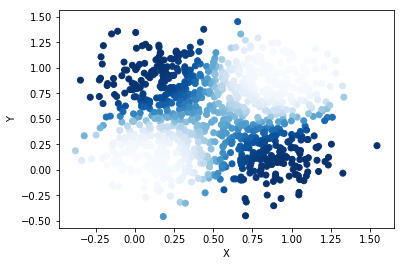

In [98]:
# Exercise 1.2.5

y = sigmoid(np.dot(phi, w))
print("Cross entropy error before optimization: {}".format(cross_entropy_error(y, t)))

for i in range(0, 1000):
    y = sigmoid(np.dot(phi, w)) # class estimates
    current_gradient = gradient_of_error(phi, y, t)
    current_hessian = hessian_of_error(phi, y)
    
    w = w - np.dot(np.linalg.inv(current_hessian), current_gradient)
    
print("Cross entropy error after optimization: {}".format(cross_entropy_error(y, t)))
print("Weights: {}".format(w))

# Normalised [0,1]
y = (y - np.min(y))/np.ptp(y)

cmap = plt.get_cmap('Blues')
plt.scatter(x[:, 0], x[:, 1], c = np.squeeze(cmap(y)))
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('figure_1_2_5.png')
plt.show()